In [1]:
%load_ext autoreload
%autoreload 2

# Test smina (and AmberTools)

In [77]:
from rdkit import Chem
from cbiprep.pdbatoms import PDBAtoms
from cbiprep.ligand_expo import LigandExpo
import pandas as pd
import subprocess as sp
import os

In [56]:
pdb_code = '4jn2'

In [57]:
pdb_atoms = PDBAtoms(f'pdb/{pdb_code}.pdb.gz')
len(pdb_atoms)

8217

In [58]:
lig_expo = LigandExpo()

In [59]:
df = pd.read_pickle('index_2019.pkl.gz')

In [60]:
lig_name = df[df['pdb'] == pdb_code]['lig'].item()
lig_name

'4CC'

In [61]:
lig_atoms = pdb_atoms.get_ligand(lig_name)

In [62]:
protein_atoms = pdb_atoms.get_relevant_protein(lig_atoms, thres=4)
len(protein_atoms)

3336

In [63]:
len(protein_atoms)

3336

In [64]:
for lig_mol in Chem.SDMolSupplier(f'work/{pdb_code}/{pdb_code}_ligand_{lig_name}.sdf'):
    break
#lig_mol

In [65]:
smi = Chem.MolToSmiles(lig_mol)
smi

'Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)c3ccccn3)ccc21'

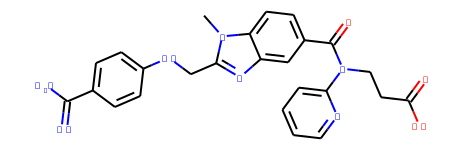

In [69]:
mol_2D = Chem.MolFromSmiles(Chem.MolToSmiles(lig_mol))
mol_2D

In [71]:
oname = f'work/{pdb_code}/{pdb_code}_relevant.pdb'
open(oname, 'wt').write(str(protein_atoms) + '\n')

270216

In [73]:
!ls -l work/4jn2

合計 284
-rw-r--r-- 1 rhara users   3021  8月  9 19:03 4jn2_ligand_4CC.sdf
-rw-r--r-- 1 rhara users  15228  8月  9 19:03 4jn2_pocket.pdb
-rw-r--r-- 1 rhara users 270216  8月 10 00:11 4jn2_relevant.pdb


<module 'rdkit.Chem' from '/usr/share/miniconda3/envs/chem37/lib/python3.7/site-packages/rdkit/Chem/__init__.py'>

In [81]:
tleaprc_template = os.path.dirname(Chem.__file__) + '/../../../../cbiprep/data/tleaprc.template'
command = 'tleap -s '
tleaprc_template

'/usr/share/miniconda3/envs/chem37/lib/python3.7/site-packages/rdkit/Chem/../../../../cbiprep/data/tleaprc.template'